In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from  sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix

In [58]:
d=pd.read_csv("income.csv")

In [59]:
inco=d.copy()

In [60]:
inco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [61]:
inco.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
inco.isnull().sum() # .sum() used  as diffcult to read by is null()


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [63]:
# Summary of 
p=inco.describe()
p

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [64]:
# Summary of categorical variables
cate= inco.describe(include='O')
cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [65]:
data['JobType'].value_counts()
data['occupation'].value_counts()  #Frequency of each category

NameError: name 'data' is not defined

In [66]:
# Checking for unique Vlaues
np.unique(data['JobType'])
np.unique(data['occupation'])

NameError: name 'data' is not defined

In [67]:
# Nan value
inco=pd.read_csv('income.csv',na_values=["?"])
inco

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [68]:
inco.isnull().sum()  # no missing values 

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [69]:
m=inco[inco.isnull().any(axis=1)]
m

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat


In [71]:
inco.dropna(axis=0)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [72]:
inco=inco.dropna(axis=0)

In [73]:
inco.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [74]:
c=inco.corr()
c

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


In [75]:
inco.columns  # accessing columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [76]:
# Normalizing Gender category
gender=pd.crosstab(index=inco['gender'],columns='count',normalize=True)
gender

col_0,count
gender,
Female,0.331728
Male,0.668272


In [77]:
# Gender vs Salary by 2 way Tables
gender1=pd.crosstab(index=inco['gender'],columns=inco['SalStat'],margins=True,normalize='index')
gender1

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.109540,0.890460
Male,0.305709,0.694291
All,0.240634,0.759366


C:\Users\Admin\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


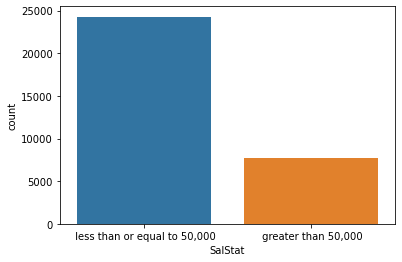

In [78]:
Salstat=sns.countplot(inco["SalStat"])

C:\Users\Admin\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

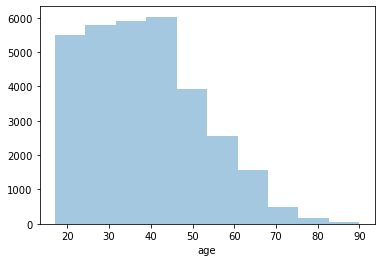

In [79]:
# Distplot by seaborn
sns.distplot(inco['age'],bins=10,kde=False)

C:\Users\Admin\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

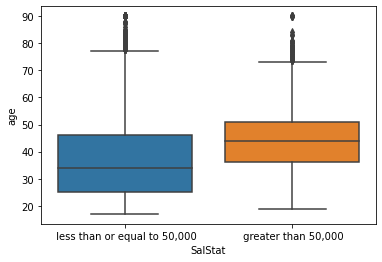

In [80]:
# Age vs Salary
sns.boxplot('SalStat','age',data=inco)

In [81]:
# Direct CoRrelation of 2 variables
d2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             44.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

In [82]:
# Logistic Regression
inco['SalStat']=inco['SalStat'].map({"less than or equal to 50000":0,'greater than 50000':1})

inco["SalStat"]



0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31973   NaN
31974   NaN
31975   NaN
31976   NaN
31977   NaN
Name: SalStat, Length: 31978, dtype: float64

In [83]:
new_data=pd.get_dummies(inco,drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
# Storing columns list
columns_list=list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Federal-gov',
 'JobType_ Local-gov',
 'JobType_ Never-worked',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct'

In [85]:
#Seprarting input names from data
features=list(set(columns_list)),set(['SalStat'])
features

(['EdType_ Doctorate',
  'occupation_ Craft-repair',
  'nativecountry_ Outlying-US(Guam-USVI-etc)',
  'nativecountry_ England',
  'SalStat',
  'JobType_ Federal-gov',
  'JobType_ Private',
  'nativecountry_ France',
  'EdType_ Masters',
  'nativecountry_ Cuba',
  'occupation_ Armed-Forces',
  'EdType_ Prof-school',
  'nativecountry_ Nicaragua',
  'capitalloss',
  'JobType_ Local-gov',
  'nativecountry_ Scotland',
  'nativecountry_ Iran',
  'nativecountry_ Guatemala',
  'maritalstatus_ Separated',
  'occupation_ Other-service',
  'nativecountry_ Peru',
  'nativecountry_ Portugal',
  'relationship_ Own-child',
  'JobType_ State-gov',
  'nativecountry_ Italy',
  'nativecountry_ Trinadad&Tobago',
  'occupation_ Tech-support',
  'nativecountry_ Taiwan',
  'nativecountry_ Hungary',
  'EdType_ 9th',
  'race_ Asian-Pac-Islander',
  'race_ Black',
  'gender_ Male',
  'nativecountry_ Holand-Netherlands',
  'JobType_ Never-worked',
  'occupation_ Prof-specialty',
  'nativecountry_ El-Salvador',
 

In [86]:
features =list(set(columns_list)-set(['SalStat']))

In [87]:
features 

['EdType_ Doctorate',
 'EdType_ 1st-4th',
 'race_ White',
 'nativecountry_ Laos',
 'occupation_ Craft-repair',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ China',
 'nativecountry_ England',
 'EdType_ HS-grad',
 'occupation_ Handlers-cleaners',
 'JobType_ Self-emp-inc',
 'occupation_ Transport-moving',
 'capitalgain',
 'JobType_ Federal-gov',
 'JobType_ Private',
 'nativecountry_ France',
 'EdType_ Masters',
 'nativecountry_ Cuba',
 'nativecountry_ Puerto-Rico',
 'EdType_ Some-college',
 'age',
 'nativecountry_ Japan',
 'EdType_ Preschool',
 'occupation_ Armed-Forces',
 'occupation_ Priv-house-serv',
 'EdType_ Prof-school',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ Thailand',
 'nativecountry_ Nicaragua',
 'nativecountry_ Hong',
 'capitalloss',
 'JobType_ Local-gov',
 'occupation_ Machine-op-inspct',
 'nativecountry_ Scotland',
 'nativecountry_ Iran',
 'nativecountry_ Guatemala',
 'race_ Other',
 'nativecountry_ Columbia',
 'maritalstatus_ Separated',
 

In [88]:
y=new_data["SalStat"].values
y

array([nan, nan, nan, ..., nan, nan, nan])

In [89]:
x=new_data[features].values
x

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]], dtype=int64)

In [90]:
# Splitting Data into test and train set
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)




In [91]:
#logistic=LogisticRegression()

In [99]:
#logistic.fit(train_x,train_y)
#logistic

In [98]:
#logistic.coef_

In [95]:
#logistic.intercept_

In [96]:
#prediction=logistic.predict(test_x)

In [97]:
#confusion_matrix=confusion_matrix(test_y,prediction)
#confusion_matrix

In [100]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [101]:
KNN_classfier=KNeighborsClassifier(n_neighbors=5)

In [102]:
KNN_classfier.fit(train_x,train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').